In [1]:
import pandas as pd
from sklearn import preprocessing, manifold
import matplotlib.pyplot as plt

In [2]:
scores = pd.read_csv('compas-scores-two-years.csv',
                     usecols=['age', 'c_charge_degree', 'race', 'score_text',
                              'sex', 'priors_count', 'days_b_screening_arrest',
                              'decile_score', 'is_recid', 'two_year_recid',
                              'c_jail_in', 'c_jail_out', 'score_text'],
                     parse_dates=['c_jail_in', 'c_jail_out'])

scores = scores[scores['days_b_screening_arrest'] <= 30]
scores = scores[scores['days_b_screening_arrest'] >= -30]
scores = scores[scores['is_recid'] != -1]
scores = scores[scores['c_charge_degree'] != 'O']
scores = scores[scores['score_text'] != 'N/A']
                
scores.head()

,sex,age,race,decile_score,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_charge_degree,is_recid,score_text,two_year_recid
0,Male,69,Other,1,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,F,0,Low,0
1,Male,34,African-American,3,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,F,1,Low,1
2,Male,24,African-American,4,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,F,1,Low,1
5,Male,44,Other,1,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,M,0,Low,0
6,Male,41,Caucasian,6,14,-1.0,2014-02-18 05:08:24,2014-02-24 12:18:30,F,1,Medium,1


In [3]:
scores.loc[:, 'c_jail_time'] = scores['c_jail_out'] - scores['c_jail_in']
scores['c_jail_time'] = scores['c_jail_time'].dt.total_seconds()
scores.head()

,sex,age,race,decile_score,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_charge_degree,is_recid,score_text,two_year_recid,c_jail_time
0,Male,69,Other,1,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,F,0,Low,0,85058.0
1,Male,34,African-American,3,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,F,1,Low,1,870686.0
2,Male,24,African-American,4,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,F,1,Low,1,93810.0
5,Male,44,Other,1,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,M,0,Low,0,113918.0
6,Male,41,Caucasian,6,14,-1.0,2014-02-18 05:08:24,2014-02-24 12:18:30,F,1,Medium,1,544206.0


In [4]:
#times_recid = scores[scores['c_jail_time'].notnull() & scores['is_recid']]['c_jail_time']
#times_norecid = scores[scores['c_jail_time'].notnull() & 1 - scores['is_recid']]['c_jail_time']

In [5]:
#scores['c_jail_time'].min(), scores['c_jail_time'].max()

In [6]:
scores = scores[['sex', 'age', 'race', 'decile_score', 'priors_count',
                 'c_jail_time', 'c_charge_degree', 'two_year_recid']]

scores['sex'].replace('Female', 0, inplace=True)
scores['sex'].replace('Male', 1, inplace=True)

scores['c_charge_degree'].replace('F', 0, inplace=True)
scores['c_charge_degree'].replace('M', 1, inplace=True)

race_dummies = pd.get_dummies(scores['race'])
scores.drop(columns='race', inplace=True)
scores = pd.concat([scores, race_dummies], axis=1)

scores.head()

,sex,age,decile_score,priors_count,c_jail_time,c_charge_degree,two_year_recid,African-American,Asian,Caucasian,Hispanic,Native American,Other
0,1,69,1,0,85058.0,0,0,0,0,0,0,0,1
1,1,34,3,0,870686.0,0,1,1,0,0,0,0,0
2,1,24,4,4,93810.0,0,1,1,0,0,0,0,0
5,1,44,1,0,113918.0,1,0,0,0,0,0,0,1
6,1,41,6,14,544206.0,0,1,0,0,1,0,0,0


In [7]:
X = preprocessing.scale(scores)
X

array([[ 0.48491348,  2.93823737, -1.20402327, ..., -0.29980275,
        -0.04225428,  4.12239846],
       [ 0.48491348, -0.04556788, -0.49960774, ..., -0.29980275,
        -0.04225428, -0.24257723],
       [ 0.48491348, -0.89808367, -0.14739998, ..., -0.29980275,
        -0.04225428, -0.24257723],
       ...,
       [ 0.48491348,  1.91521843, -1.20402327, ..., -0.29980275,
        -0.04225428,  4.12239846],
       [-2.06222355, -0.13081946, -0.85181551, ..., -0.29980275,
        -0.04225428, -0.24257723],
       [-2.06222355, -0.98333525, -0.14739998, ...,  3.33552646,
        -0.04225428, -0.24257723]])

In [8]:
lda = manifold.TSNE()
X_new = lda.fit_transform(X)

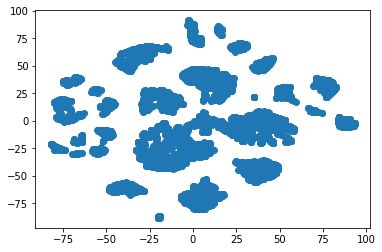

In [9]:
tsne = pd.DataFrame(X_new, columns=['x', 'y'])
plt.scatter(tsne['x'], tsne['y'])
plt.show()